In [1]:
import random
import torch
import numpy as np
import gym
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import math
from torch.distributions import Categorical
import import_ipynb
import multiprocessing_env


importing Jupyter notebook from multiprocessing_env.ipynb


In [2]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [16]:

env_name = "CartPole-v0"
env = gym.make(env_name)

/home/iyer/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [4]:
class Policy(nn.Module):
    def __init__(self, input_dims,n_actions, h1, h2,lr):
        super(Policy,self).__init__()
        self.input_dims = input_dims
        self.lr = lr
        self.h1 = h1
        self.h2 = h2
        self.n_actions = n_actions
        self.linear1 = nn.Linear(*self.input_dims, self.h1)
        self.linear2 = nn.Linear(self.h1, self.h2)
        self.linear3 = nn.Linear(self.h2, self.n_actions)

    def forward(self,obs):
        x = torch.tensor(obs,dtype=torch.float)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)

        return x

In [5]:
input_dims=env.observation_space.shape[0]
n_actions=env.action_space.n
model=Policy([input_dims],n_actions,h1=64,h2=16,lr=0.001)



In [6]:
optimizer=optim.Adam(model.parameters())

In [7]:
num_episodes=1000
gamma=0.99
lr=0.001
returns=0
returns_list=[]



In [8]:
def plot(rewards):
    score = np.array(rewards)
    iters = np.arange(len(rewards))
    plt.plot(iters,score)
    plt.xlabel('training iterations')
    plt.ylabel('Total rewards')
    plt.show()

    


episode:  0 reward 0.00
episode:  1 reward 21.00
episode:  2 reward 29.00
episode:  3 reward 29.00
episode:  4 reward 27.00
episode:  5 reward 20.00
episode:  6 reward 16.00
episode:  7 reward 15.00
episode:  8 reward 41.00
episode:  9 reward 22.00
episode:  10 reward 20.00


/home/iyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  from ipykernel import kernelapp as app
/home/iyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


episode:  11 reward 58.00
episode:  12 reward 12.00
episode:  13 reward 25.00
episode:  14 reward 15.00
episode:  15 reward 19.00
episode:  16 reward 25.00
episode:  17 reward 14.00
episode:  18 reward 13.00
episode:  19 reward 23.00
episode:  20 reward 57.00
episode:  21 reward 34.00
episode:  22 reward 13.00
episode:  23 reward 13.00
episode:  24 reward 43.00
episode:  25 reward 23.00
episode:  26 reward 10.00
episode:  27 reward 30.00
episode:  28 reward 17.00
episode:  29 reward 64.00
episode:  30 reward 13.00
episode:  31 reward 17.00
episode:  32 reward 18.00
episode:  33 reward 13.00
episode:  34 reward 27.00
episode:  35 reward 11.00
episode:  36 reward 16.00
episode:  37 reward 49.00
episode:  38 reward 20.00
episode:  39 reward 19.00
episode:  40 reward 13.00
episode:  41 reward 18.00
episode:  42 reward 20.00
episode:  43 reward 29.00
episode:  44 reward 47.00
episode:  45 reward 19.00
episode:  46 reward 31.00
episode:  47 reward 12.00
episode:  48 reward 51.00
episode:  49

episode:  316 reward 200.00
episode:  317 reward 200.00
episode:  318 reward 200.00
episode:  319 reward 200.00
episode:  320 reward 200.00
episode:  321 reward 200.00
episode:  322 reward 200.00
episode:  323 reward 200.00
episode:  324 reward 169.00
episode:  325 reward 133.00
episode:  326 reward 141.00
episode:  327 reward 193.00
episode:  328 reward 200.00
episode:  329 reward 75.00
episode:  330 reward 200.00
episode:  331 reward 144.00
episode:  332 reward 200.00
episode:  333 reward 200.00
episode:  334 reward 155.00
episode:  335 reward 200.00
episode:  336 reward 155.00
episode:  337 reward 200.00
episode:  338 reward 200.00
episode:  339 reward 161.00
episode:  340 reward 200.00
episode:  341 reward 178.00
episode:  342 reward 200.00
episode:  343 reward 200.00
episode:  344 reward 169.00
episode:  345 reward 169.00
episode:  346 reward 200.00
episode:  347 reward 193.00
episode:  348 reward 161.00
episode:  349 reward 99.00
episode:  350 reward 200.00
episode:  351 reward 1

episode:  611 reward 200.00
episode:  612 reward 136.00
episode:  613 reward 200.00
episode:  614 reward 200.00
episode:  615 reward 200.00
episode:  616 reward 200.00
episode:  617 reward 200.00
episode:  618 reward 200.00
episode:  619 reward 121.00
episode:  620 reward 200.00
episode:  621 reward 140.00
episode:  622 reward 200.00
episode:  623 reward 200.00
episode:  624 reward 200.00
episode:  625 reward 200.00
episode:  626 reward 200.00
episode:  627 reward 125.00
episode:  628 reward 114.00
episode:  629 reward 200.00
episode:  630 reward 110.00
episode:  631 reward 200.00
episode:  632 reward 200.00
episode:  633 reward 200.00
episode:  634 reward 200.00
episode:  635 reward 200.00
episode:  636 reward 120.00
episode:  637 reward 200.00
episode:  638 reward 200.00
episode:  639 reward 200.00
episode:  640 reward 121.00
episode:  641 reward 200.00
episode:  642 reward 147.00
episode:  643 reward 200.00
episode:  644 reward 200.00
episode:  645 reward 112.00
episode:  646 reward

episode:  905 reward 200.00
episode:  906 reward 200.00
episode:  907 reward 200.00
episode:  908 reward 200.00
episode:  909 reward 200.00
episode:  910 reward 200.00
episode:  911 reward 200.00
episode:  912 reward 200.00
episode:  913 reward 200.00
episode:  914 reward 200.00
episode:  915 reward 200.00
episode:  916 reward 200.00
episode:  917 reward 200.00
episode:  918 reward 200.00
episode:  919 reward 200.00
episode:  920 reward 200.00
episode:  921 reward 200.00
episode:  922 reward 200.00
episode:  923 reward 200.00
episode:  924 reward 200.00
episode:  925 reward 200.00
episode:  926 reward 200.00
episode:  927 reward 200.00
episode:  928 reward 200.00
episode:  929 reward 200.00
episode:  930 reward 200.00
episode:  931 reward 200.00
episode:  932 reward 200.00
episode:  933 reward 200.00
episode:  934 reward 200.00
episode:  935 reward 200.00
episode:  936 reward 200.00
episode:  937 reward 200.00
episode:  938 reward 200.00
episode:  939 reward 200.00
episode:  940 reward

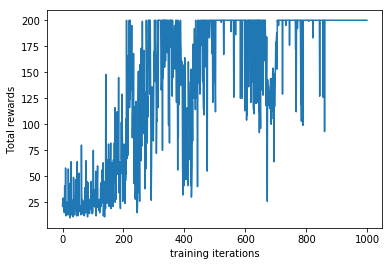

In [9]:
for i in range(num_episodes):
    print('episode: ', i, 'reward %.2f' % returns)
    log_probs=[]
    reward_list=[]
    returns=0
    entropy=0
    state=env.reset()
    done=False
    while not done:
        state=torch.FloatTensor(state)
        X=model(state)
        probs=F.softmax(X)
        dist=Categorical(probs)
        action=dist.sample()
        next_state,reward,done,_=env.step(action.item())
        log_probs.append(dist.log_prob(action))
        reward_list.append(reward)
        entropy+=dist.entropy().mean()
        state = next_state
        returns+=reward
    G=np.zeros_like(reward_list,np.float64)
    for t in range(len(reward_list)):
        g=0
        discount=1
        for i in range(t,len(reward_list)):
            g+=reward_list[i]*discount
            discount*=gamma
        G[t]=g
    loss=0
    for g,log_prob in zip(G,log_probs):
        loss +=-g*log_prob-entropy*0.001
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    returns_list.append(returns)
    
plot(returns_list)    
    
        
        
        
        

In [17]:

def test_env(vis=False):
    state = env.reset()
    if vis: env.render()
    done = False
    total_reward = 0
    while not done:
        state = torch.FloatTensor(state)
        X = model(state)
        probs=F.softmax(X)
        dist=Categorical(probs)
        next_state, reward, done, _ = env.step(dist.sample().item())
        state = next_state
        if vis: env.render()
        total_reward += reward
    return total_reward

In [18]:
test_env(True)
        
        
        
        
        
        
        
        

/home/iyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  from ipykernel import kernelapp as app
/home/iyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


200.0